# Proyecto final

**Equipo:**




**Objetivo:** analizar mensaje, tanto de texto como audio, para ordenarlos por importancia usando análisis de sentimientos.



In [2]:
#pip install emoji


In [3]:
import re
import emoji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## **1. Cargar el archivo.**

In [5]:
df = pd.read_csv("Mensajes_Analisis.csv")
df.head()


,Mensaje,Urgente,Fecha,Hora,Autor,Grupo
0,"Oye, ya subisteeee la tarea 📝? Hoy es el últim...",1,23/03/25,8:00,Cynthia,Team Maestría
1,Profe acaba de decir que adelantó sin avisar 😵...,1,21/01/25,8:15,Cynthia,Team Maestría
2,"No me carga el archivo 📎 que mandaste tú jeje,...",1,06/01/25,11:30,Walter,Team Maestría
3,¿Tienes los datos 📊 del proyecto? Tenemos que ...,1,14/02/25,16:45,Walter,Team Maestría
4,Se me borró el código del modelo ese que hicim...,1,25/03/25,8:00,Walter,Team Maestría


In [6]:
df = df.rename(columns={"Mensaje": "mensaje", "Urgente": "urgente"})
df.head()


,mensaje,urgente,Fecha,Hora,Autor,Grupo
0,"Oye, ya subisteeee la tarea 📝? Hoy es el últim...",1,23/03/25,8:00,Cynthia,Team Maestría
1,Profe acaba de decir que adelantó sin avisar 😵...,1,21/01/25,8:15,Cynthia,Team Maestría
2,"No me carga el archivo 📎 que mandaste tú jeje,...",1,06/01/25,11:30,Walter,Team Maestría
3,¿Tienes los datos 📊 del proyecto? Tenemos que ...,1,14/02/25,16:45,Walter,Team Maestría
4,Se me borró el código del modelo ese que hicim...,1,25/03/25,8:00,Walter,Team Maestría


## **2. Funciones de limpieza y análisis.**

### 2.1 Limpieza del texto

In [9]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto


###  2.2 Análisis de Sentimientos

In [11]:
def obtener_polaridad(texto):
    return TextBlob(texto).sentiment.polarity


In [12]:
def clasificar_sentimiento(polaridad):
    if polaridad < -0.1:
        return "Negativo"
    elif polaridad > 0.1:
        return "Positivo"
    else:
        return "Neutro"
        

### 2.3 Emojis.

In [14]:
def extraer_emojis(texto):
    return [char for char in texto if char in emoji.EMOJI_DATA]
    

## **3. Aplicar análisis.**

### 3.1 Análisis de emojis.

/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/2402739334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_emojis, x="emoji", y="frecuencia", palette="pastel")
/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/2402739334.py:11: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/2402739334.py:11: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/2402739334.py:11: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128556 (\N{GRIMA

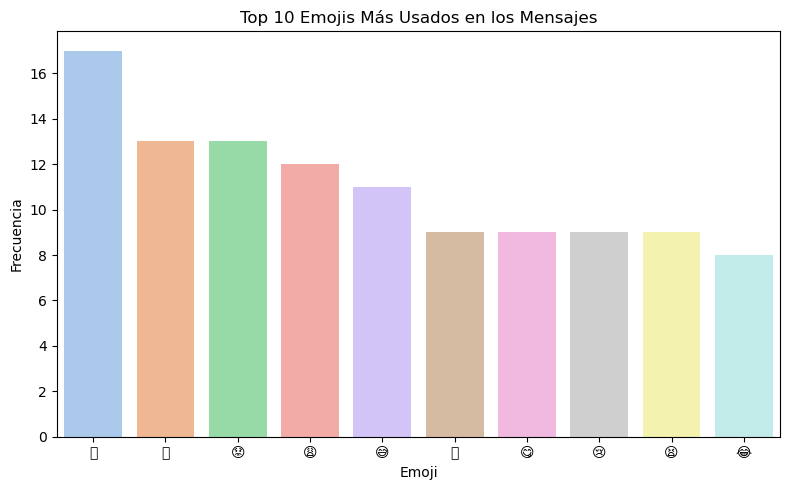

In [17]:
todos_emojis = df["mensaje"].apply(extraer_emojis).sum()
conteo_emojis = Counter(todos_emojis).most_common(10)

df_emojis = pd.DataFrame(conteo_emojis, columns=["emoji", "frecuencia"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_emojis, x="emoji", y="frecuencia", palette="pastel")
plt.title("Top 10 Emojis Más Usados en los Mensajes")
plt.xlabel("Emoji")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


### 3.2 Limpieza de texto.

In [19]:
df["mensaje_limpio"] = df["mensaje"].apply(limpiar_texto)


In [20]:
df[["mensaje", "mensaje_limpio"]].head()


,mensaje,mensaje_limpio
0,"Oye, ya subisteeee la tarea 📝? Hoy es el últim...",oye ya subisteeee la tarea hoy es el último dí...
1,Profe acaba de decir que adelantó sin avisar 😵...,profe acaba de decir que adelantó sin avisar l...
2,"No me carga el archivo 📎 que mandaste tú jeje,...",no me carga el archivo que mandaste tú jeje pu...
3,¿Tienes los datos 📊 del proyecto? Tenemos que ...,tienes los datos del proyecto tenemos que pres...
4,Se me borró el código del modelo ese que hicim...,se me borró el código del modelo ese que hicim...


### 3.3 Análisis de sentimiento

In [22]:
df["sentimiento"] = df["mensaje_limpio"].apply(obtener_polaridad)
df["tipo_sentimiento"] = df["sentimiento"].apply(clasificar_sentimiento)


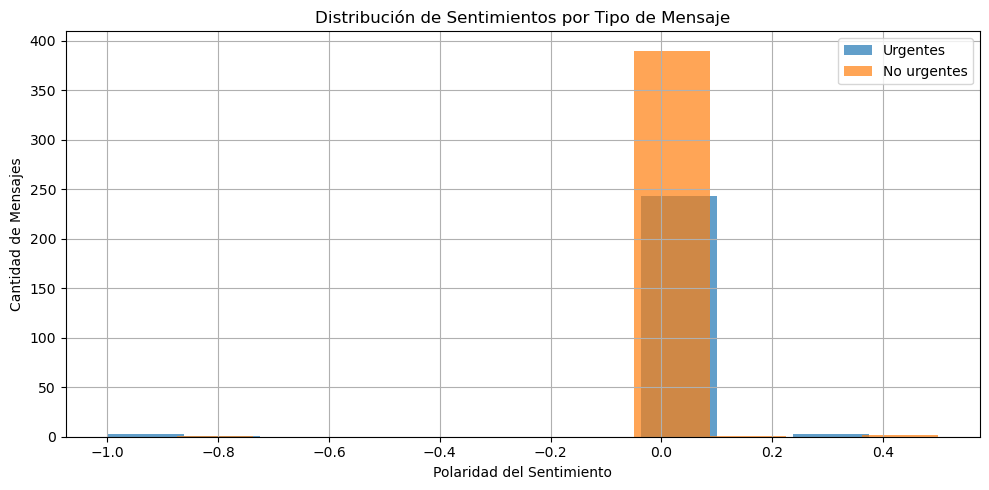

In [23]:
# -------------------------------
# 3.3.1 Visualización de polaridad por tipo de mensaje
# -------------------------------
df_urgentes = df[df["urgente"] == 1]
df_no_urgentes = df[df["urgente"] == 0]

plt.figure(figsize=(10, 5))
plt.hist(df_urgentes["sentimiento"], bins=10, alpha=0.7, label="Urgentes")
plt.hist(df_no_urgentes["sentimiento"], bins=10, alpha=0.7, label="No urgentes")
plt.title("Distribución de Sentimientos por Tipo de Mensaje")
plt.xlabel("Polaridad del Sentimiento")
plt.ylabel("Cantidad de Mensajes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


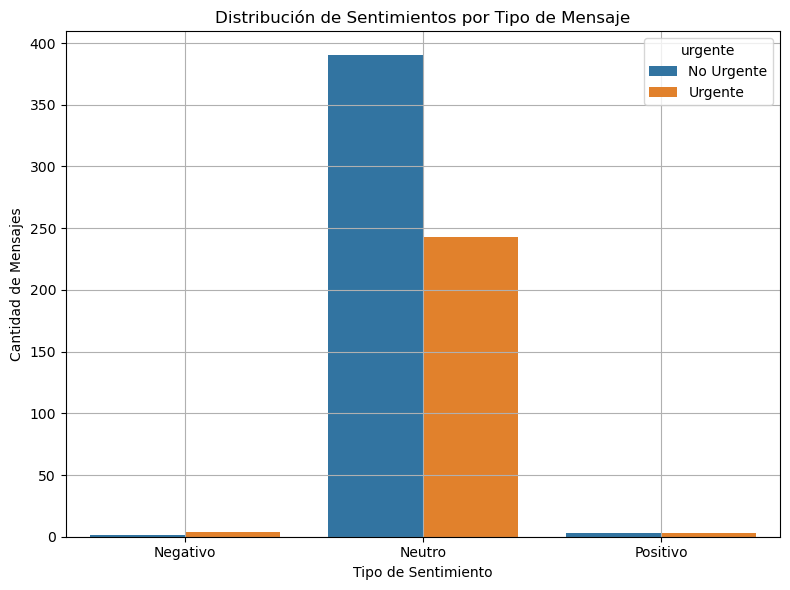

In [24]:
# -------------------------------
# 3.3.2 Conteo por urgencia y tipo de sentimiento
# -------------------------------
conteo_sentimientos = df.groupby(["urgente", "tipo_sentimiento"]).size().reset_index(name="cantidad")
conteo_sentimientos["urgente"] = conteo_sentimientos["urgente"].map({1: "Urgente", 0: "No Urgente"})

# Gráfico de barras por tipo de sentimiento
plt.figure(figsize=(8, 6))
sns.barplot(data=conteo_sentimientos, x="tipo_sentimiento", y="cantidad", hue="urgente")
plt.title("Distribución de Sentimientos por Tipo de Mensaje")
plt.xlabel("Tipo de Sentimiento")
plt.ylabel("Cantidad de Mensajes")
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.4 Visualizaciones.

#### 🔴 **Urgente**

/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/3623124167.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=urgentes_por_autor, x="autor", y="mensajes_urgentes", palette="Reds_r")


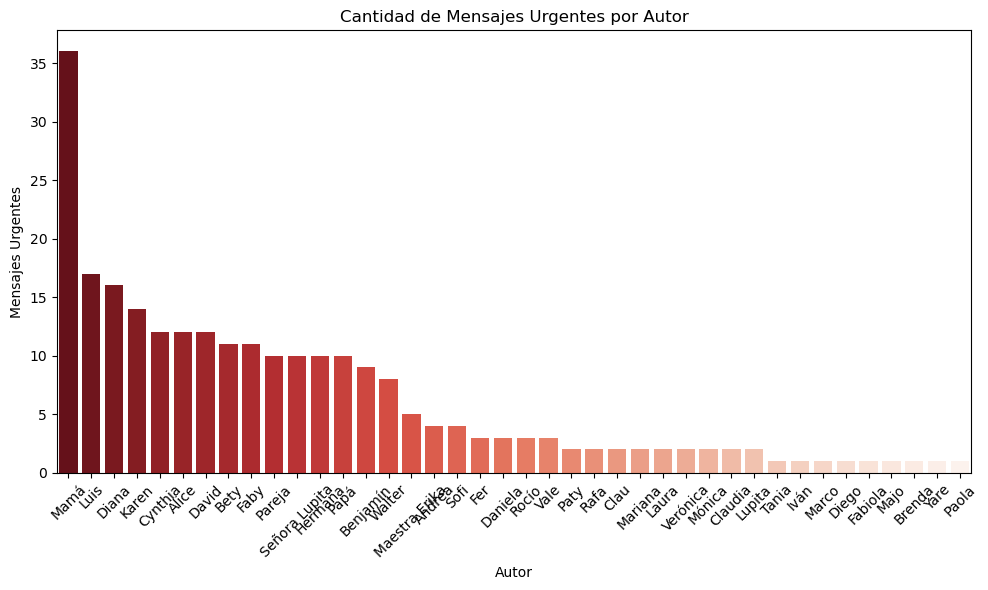

In [27]:
# -------------------------------
# Mensajes urgentes por autor
# -------------------------------
urgentes_por_autor = df[df["urgente"] == 1]["Autor"].value_counts().reset_index()
urgentes_por_autor.columns = ["autor", "mensajes_urgentes"]

plt.figure(figsize=(10, 6))
sns.barplot(data=urgentes_por_autor, x="autor", y="mensajes_urgentes", palette="Reds_r")
plt.title("Cantidad de Mensajes Urgentes por Autor")
plt.xlabel("Autor")
plt.ylabel("Mensajes Urgentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🟢 **No urgente**

/var/folders/ct/cf8v_6td4sjd6_m0d5bnd1mc0000gn/T/ipykernel_9656/3705871918.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=no_urgentes_por_autor, x="autor", y="mensajes_no_urgentes", palette="Blues")


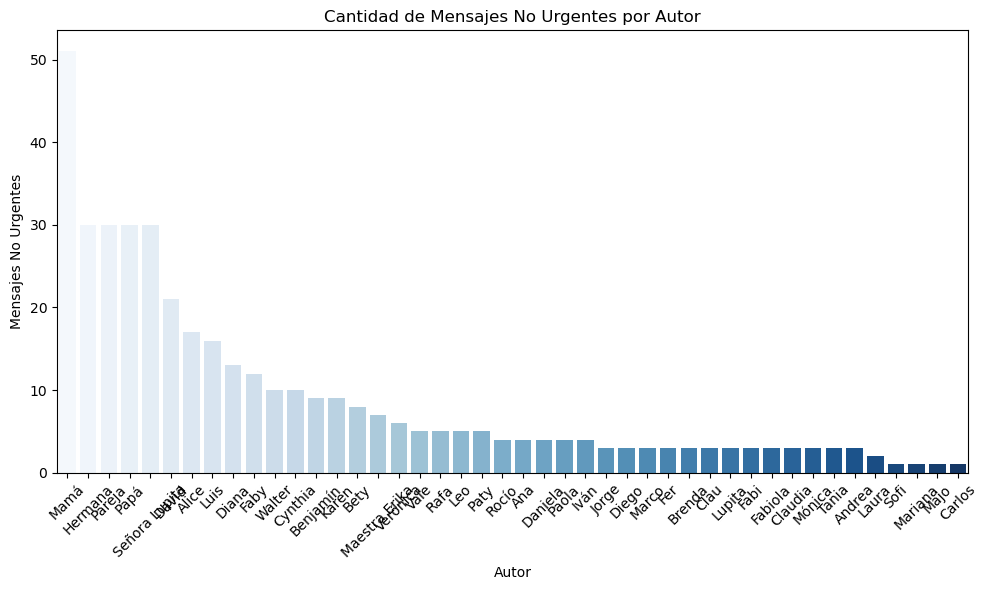

In [29]:
# -------------------------------
# Mensajes no urgentes por autor
# -------------------------------
no_urgentes_por_autor = df[df["urgente"] == 0]["Autor"].value_counts().reset_index()
no_urgentes_por_autor.columns = ["autor", "mensajes_no_urgentes"]

plt.figure(figsize=(10, 6))
sns.barplot(data=no_urgentes_por_autor, x="autor", y="mensajes_no_urgentes", palette="Blues")
plt.title("Cantidad de Mensajes No Urgentes por Autor")
plt.xlabel("Autor")
plt.ylabel("Mensajes No Urgentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **4. Modelos predictivos.**

📦 Modelos que vamos a probar:
- Logistic Regression
- Random Forest
- Multinomial Naive Bayes
- Support Vector Machine (SVM)

### 4.1 Vectorización con *TF-IDF*

In [32]:
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(df["mensaje_limpio"])  # variables predictoras
y = df["urgente"]  # variable objetivo


### 4.2 División del dataset (train/test)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


### 4.3 Prueba de modelos

In [36]:
# MODELOS a comparar
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC()
}


In [37]:
# EVALUACIÓN
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })
    

In [38]:
# Convertir resultados a DataFrame para ver mejor
df_resultados = pd.DataFrame(resultados).sort_values(by="F1 Score", ascending=False)
df_resultados


,Modelo,Accuracy,Precision,Recall,F1 Score
3,SVM (Linear),0.863354,0.821429,0.793103,0.807018
2,Naive Bayes,0.844720,0.836735,0.706897,0.766355
1,Random Forest,0.770186,0.733333,0.568966,0.640777
0,Logistic Regression,0.776398,0.775000,0.534483,0.632653
